In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression

In [49]:
df = pd.read_csv(r"G:\DataSets\insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [51]:
df.describe()   # Gives the statistical information about the data

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [52]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

C:\Users\nilad\AppData\Local\Temp\ipykernel_3192\3285567281.py:5: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



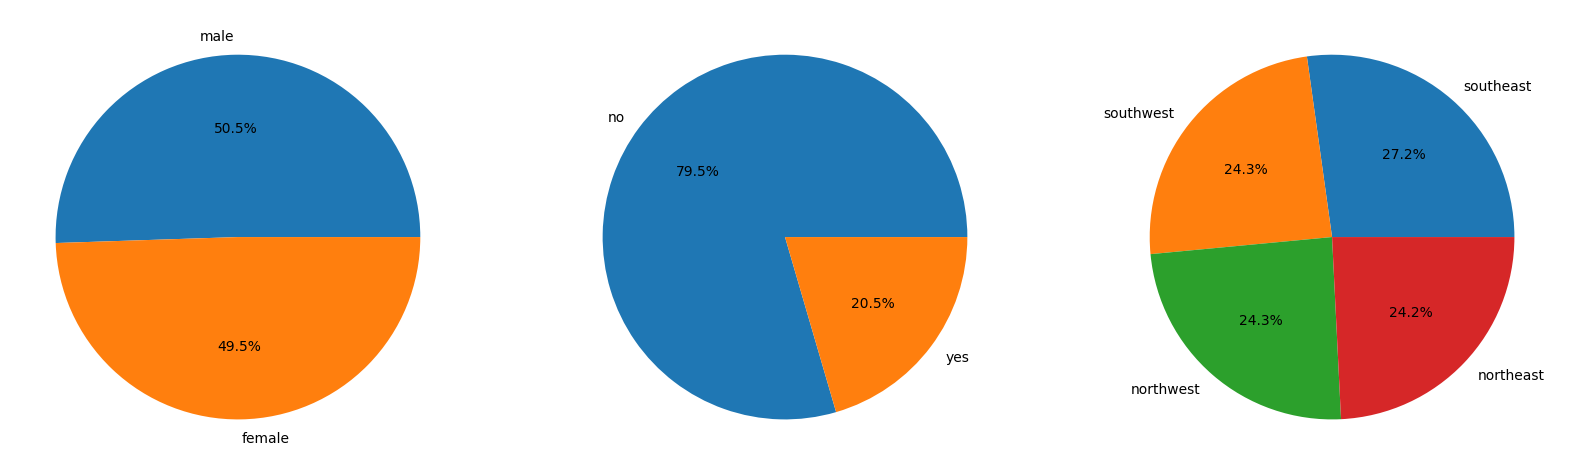

In [53]:
features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(1, 3, i + 1)

	x = df[col].value_counts()
	plt.pie(x.values,
			labels=x.index, # type: ignore
			autopct='%1.1f%%')

plt.show()


Mapping the categorical values to numerical values 

In [54]:
df['sex']=df['sex'].map({'female':0, 'male':1}) 
df['smoker']=df['smoker'].map({'no':0, 'yes':1}) 

In [55]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [56]:
import plotly.express as px

Counting the values of each region

In [57]:
pie = df['region'].value_counts() 
fig = px.pie(df, values=pie.values, names=pie.index, title='Region')  
fig.show()

In [58]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [59]:
df = df.drop(['region'], axis=1) # Dropping the region column

In [60]:
df.head()

,age,sex,bmi,children,smoker,expenses
0,19,0,27.9,0,1,16884.92
1,18,1,33.8,1,0,1725.55
2,28,1,33.0,3,0,4449.46
3,33,1,22.7,0,0,21984.47
4,32,1,28.9,0,0,3866.86


In [65]:
df_select=df.iloc[:,[3,4,5]]
df_select

,children,smoker,expenses
0,0,1,16884.92
1,1,0,1725.55
2,3,0,4449.46
3,0,0,21984.47
4,0,0,3866.86
...,...,...,...
1333,3,0,10600.55
1334,0,0,2205.98
1335,0,0,1629.83
1336,0,0,2007.95


In [66]:
df_select.corr()

,children,smoker,expenses
children,1.000000,0.007673,0.067998
smoker,0.007673,1.000000,0.787251
expenses,0.067998,0.787251,1.000000


In [69]:
df_select.head()

,children,smoker,expenses
0,0,1,16884.92
1,1,0,1725.55
2,3,0,4449.46
3,0,0,21984.47
4,0,0,3866.86


In [70]:
df_select.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of       children  smoker  expenses
0            0       1  16884.92
1            1       0   1725.55
2            3       0   4449.46
3            0       0  21984.47
4            0       0   3866.86
...        ...     ...       ...
1333         3       0  10600.55
1334         0       0   2205.98
1335         0       0   1629.83
1336         0       0   2007.95
1337         0       1  29141.36

[1338 rows x 3 columns]>

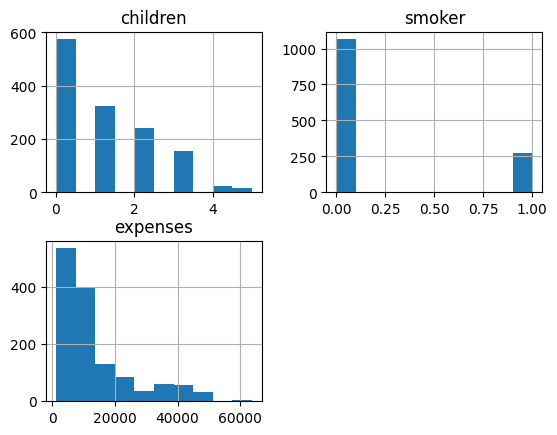

In [71]:
df_select.hist()
plt.show()

In [75]:
X_ID=df_select.iloc[:,0:2]
Y_DV=df_select["expenses"]

In [76]:
X_ID

,children,smoker
0,0,1
1,1,0
2,3,0
3,0,0
4,0,0
...,...,...
1333,3,0
1334,0,0
1335,0,0
1336,0,0


In [77]:
Y_DV

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [78]:
trainer=LinearRegression()

In [79]:
learner=trainer.fit(X_ID,Y_DV)

In [80]:
learner.coef_

array([  622.4432896 , 23601.70140238])

In [81]:
learner.intercept_

7755.6648628432495

In [82]:
Ytar=Y_DV.values

In [83]:
Ytar.ndim

1

In [84]:
expenses_predict = learner.predict(X_ID)

In [85]:
df_select['expenses_predict']=expenses_predict

C:\Users\nilad\AppData\Local\Temp\ipykernel_3192\2110177293.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
df_select

,children,smoker,expenses,expenses_predict
0,0,1,16884.92,31357.366265
1,1,0,1725.55,8378.108152
2,3,0,4449.46,9622.994732
3,0,0,21984.47,7755.664863
4,0,0,3866.86,7755.664863
...,...,...,...,...
1333,3,0,10600.55,9622.994732
1334,0,0,2205.98,7755.664863
1335,0,0,1629.83,7755.664863
1336,0,0,2007.95,7755.664863


Error Checking

In [87]:
from sklearn.metrics import mean_squared_error

In [88]:
Error=mean_squared_error(expenses_predict,Y_DV)

In [89]:
Error

55158143.61884807